In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import hdbscan
from sklearn.metrics import silhouette_score

# Introduction

We embark on a journey to decode the secrets of customer behavior and engagement through the lens of transactional patterns using a range of machine learning techniques. Our investigation, grounded in exploratory data analysis (EDA), feature engineering, dimensionality reduction, and clustering, follows a robust methodology (Precisa, 2023).

Starting with a thorough EDA and data cleaning process, akin to successful techniques from previous datasets (Finezza Blog, 2022), we seek to understand the data's underlying structure. This stage is pivotal for preparing the dataset for a deeper dive. Feature engineering follows, where we create new variables that capture the essence of the data, thereby transforming raw figures into meaningful features that reveal intricate transactional patterns.

As we proceed, we tackle dimensionality through Principal Component Analysis (PCA). This step simplifies the data while retaining essential information, aiding in the visualization and interpretation of complex patterns (Avenga, 2023). K-means clustering guides us to identify distinct groupings within the data, using the elbow method and a suitable goodness of fit metric to find the optimal number of clusters (Bain & Company, 2023).

The subsequent phase of cluster interpretation allows us to answer our primary business question: "How can a bank optimize its customer engagement and marketing strategies to enhance customer satisfaction and profitability based on transactional behaviors?" (Bain & Company, 2023).

Additionally, we compare K-means clustering with H-DBSCAN to determine the most effective method for our unique dataset. This analytical comparison is crucial for providing actionable insights that can transform customer engagement and marketing strategies, ultimately leading to increased bank satisfaction and profitability (Precisa, 2023).

Through this analytical process, we leverage AI-driven bank transaction data analysis tools for predictive insights (Finezza Blog, 2022), enhance fraud detection capabilities, and provide tailored financial recommendations (Avenga, 2023). The unbundling of banking services and the rise of neobanks emphasize the need for personalized customer experiences to maintain and improve loyalty and engagement (Bain & Company, 2023).

In addition to the primary question, the sub-questions address specific dimensions in customer engagement and personalization:
1. What patterns and anomalies in transaction volumes and amounts across different demographics and time periods can be identified to tailor customer engagement?​

2. How can new features be engineered from the dataset to better understand customer behaviors?​

3. What distinct customer segments can be identified using K-means clustering, and how do these segments differ in their transactional behavior?​

4. Based on the interpretation of the transactional behaviour of each customer cluster, what targeted strategies can be developed to enhance customer satisfaction and profitability?

In summary, by harnessing advanced analytics and personalization, banks can optimize customer engagement, tailor marketing strategies, and ultimately enhance both customer satisfaction and profitability.


References
Avenga. (2023). Big Data In Banking: Opportunities, Challenges, And Future Prospects. Retrieved from https://www.avenga.com/blog/big-data-in-banking/
Bain & Company. (2023). Customer Behavior and Loyalty in Banking: Global Edition 2023. Retrieved from https://www.bain.com/insights/customer-behavior-loyalty-in-banking-global-edition-2023/
Finezza Blog. (2022). How to Generate and Use Insights From Bank Transaction Data Analysis. Retrieved from https://www.finezza.in/blog/how-to-generate-and-use-insights-from-bank-transaction-data-analysis/
Precisa. (2023). Enhancing Customer Experience with Personalised Bank Transaction Analysis. Retrieved from https://www.precisa.in/blog/enhancing-customer-experience-with-personalised-bank-transaction-analysis/


# Exploratory data analysis and data cleaning of the dataset

In [100]:
# Load the dataset
df = pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [101]:
# Checking on the shape of the dataset
df.shape

(1048567, 9)

In [102]:
# Checking on the different variables and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [103]:
# Checking on NaN Values
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

There are missing values in CustomerDOB, CustGender, CustLocation, and CustAccountBalance

In [104]:
# Data cleaning: dropping rows with missing values
df.dropna(inplace = True)

In [105]:
# Convert date and time columns to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H%M%S', errors='coerce').dt.time

In [106]:
# Generate summary statistics and identify potential outliers
df.describe()

,CustAccountBalance,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.566096e+03
std,8.467609e+05,6.561464e+03
min,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.600000e+02
50%,1.676852e+04,4.575000e+02
75%,5.742885e+04,1.200000e+03
max,1.150355e+08,1.560035e+06


- CustAccountBalance and TransactionAmount (INR) show a wide range of values with significant differences between the mean and median, indicating potential outliers or a skewed distribution.
- The standard deviation for CustAccountBalance is quite high, suggesting considerable variation among account balances.

(array([2.80635e+05, 7.60978e+05, 1.00000e+00]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

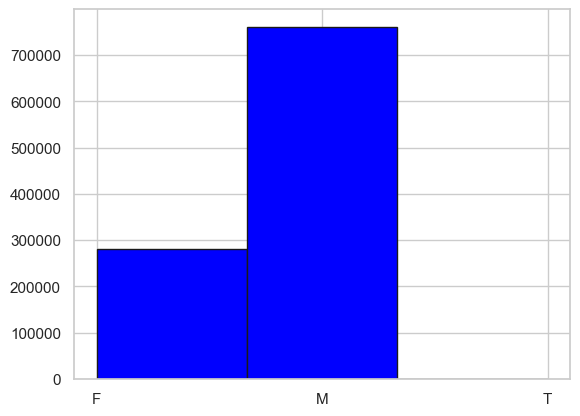

In [107]:
# Visualize gender distribution
plt.hist(df['CustGender'], bins = 3, facecolor = 'blue', edgecolor = 'k')

In [108]:
# Data cleaning: Removing 'T' value in 'CustGender'
df = df[df['CustGender'] != 'T']

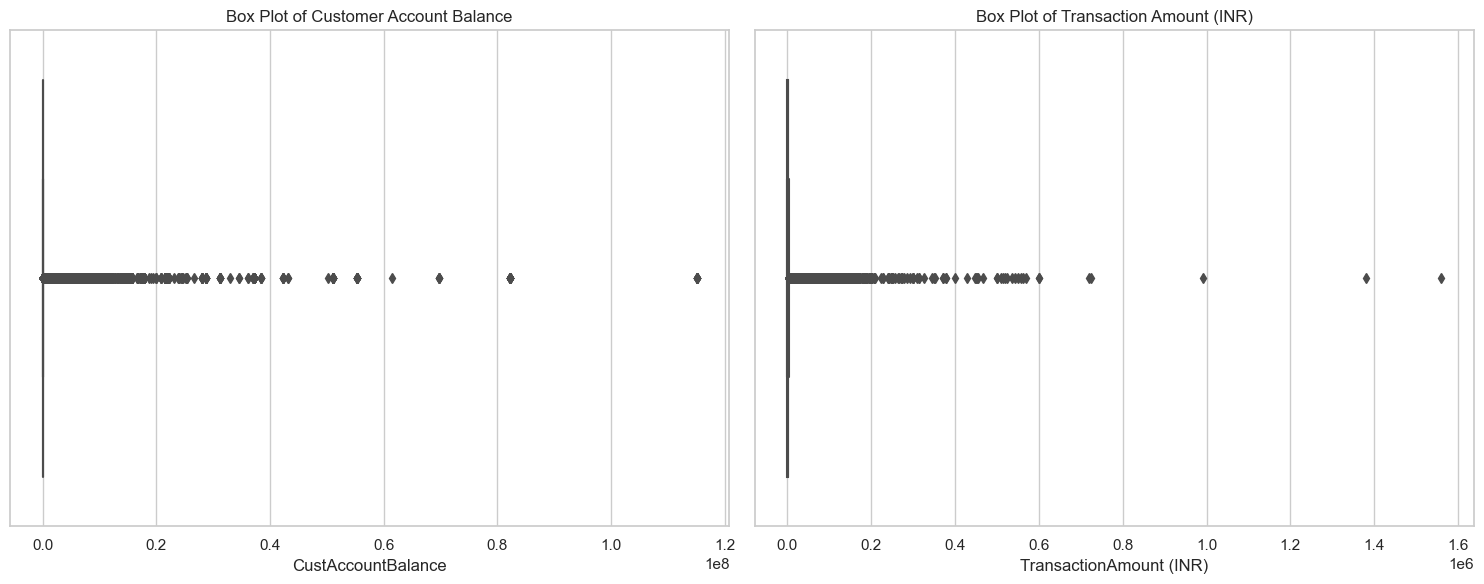

In [109]:
# Setting the style of the plots
sns.set(style="whitegrid")

# Creating box plots for CustAccountBalance and TransactionAmount (INR)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x=df['CustAccountBalance'], ax=ax[0])
ax[0].set_title('Box Plot of Customer Account Balance')

sns.boxplot(x=df['TransactionAmount (INR)'], ax=ax[1])
ax[1].set_title('Box Plot of Transaction Amount (INR)')

plt.tight_layout()
plt.show()

The box plots for CustAccountBalance and TransactionAmount (INR) reveal a significant presence of outliers in both variables. These outliers are values that lie far outside the interquartile range and could potentially skew our analysis.

To get a better sense of the distribution without the influence of extreme outliers, we'll create histograms for these variables. We  applying a log scale to handle these outliers effectively, especially because they are not errors but actual transactional data.

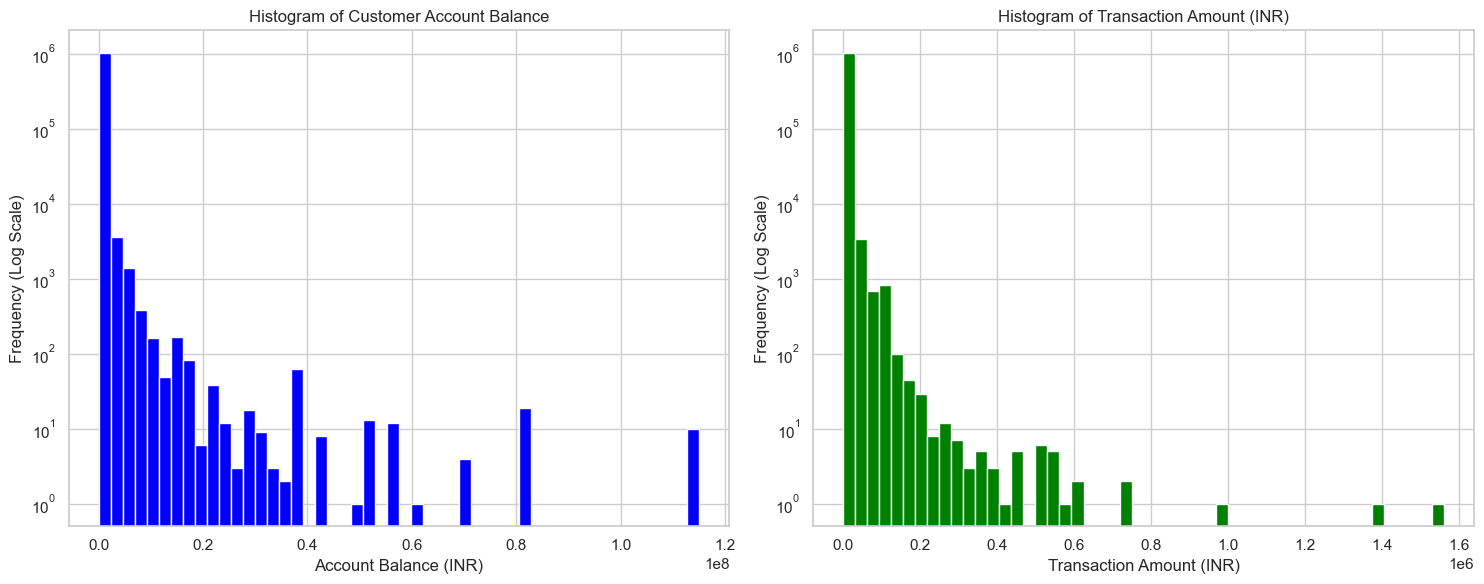

In [110]:
# Creating histograms for CustAccountBalance and TransactionAmount (INR)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Since the data contains outliers which will skew the histogram, we use a log scale for better visualization
ax[0].hist(df['CustAccountBalance'], bins=50, color='blue', log=True)
ax[0].set_title('Histogram of Customer Account Balance')
ax[0].set_xlabel('Account Balance (INR)')
ax[0].set_ylabel('Frequency (Log Scale)')

ax[1].hist(df['TransactionAmount (INR)'], bins=50, color='green', log=True)
ax[1].set_title('Histogram of Transaction Amount (INR)')
ax[1].set_xlabel('Transaction Amount (INR)')
ax[1].set_ylabel('Frequency (Log Scale)')

plt.tight_layout()
plt.show()

- Customer Account Balance: The distribution is heavily skewed towards lower account balances, with a long tail extending towards higher values. This indicates that most customers have relatively low account balances, but there are a few with very high balances.
- Transaction Amount (INR): Similar to account balances, the transaction amounts are also skewed towards smaller values, with fewer large transactions.

The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics (Log Transformations, n.d.).

In [111]:
# Log transformation for CustAccountBalance and TransactionAmount (INR)
df['CustAccountBalance_log'] = np.log(df['CustAccountBalance'] + 1)
df['TransactionAmount_log'] = np.log(df['TransactionAmount (INR)'] + 1)

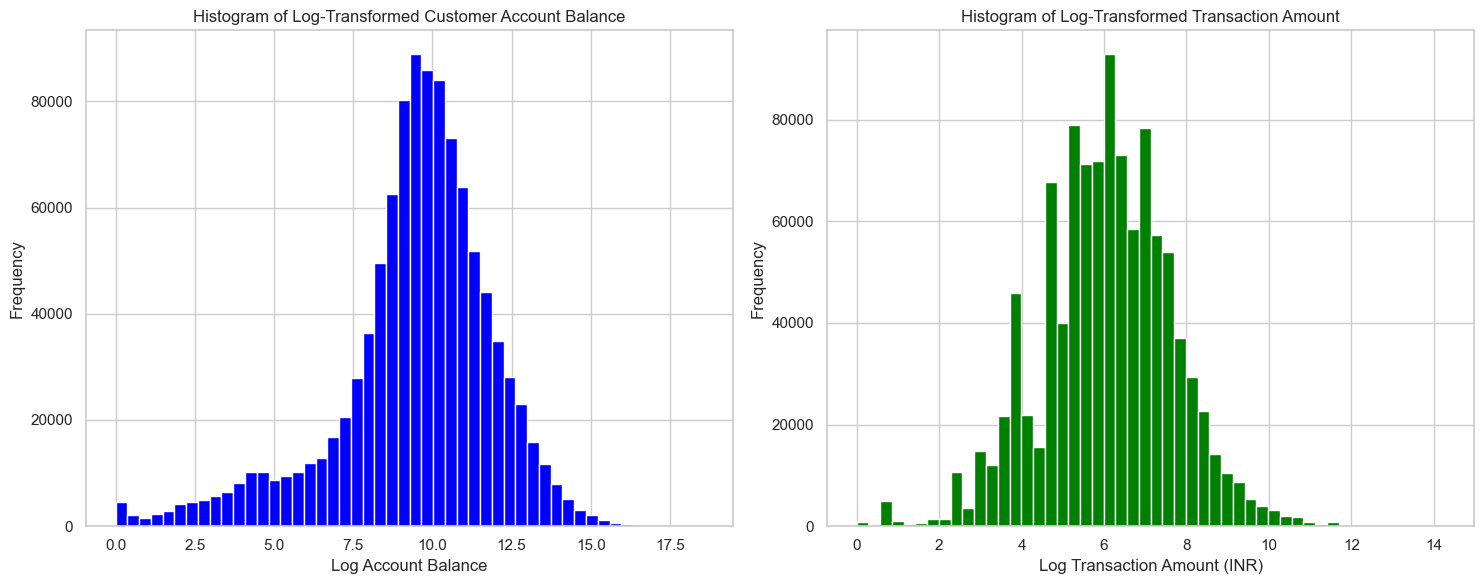

In [112]:
# Creating histograms for the log-transformed data
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(df['CustAccountBalance_log'], bins=50, color='blue')
ax[0].set_title('Histogram of Log-Transformed Customer Account Balance')
ax[0].set_xlabel('Log Account Balance')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['TransactionAmount_log'], bins=50, color='green')
ax[1].set_title('Histogram of Log-Transformed Transaction Amount')
ax[1].set_xlabel('Log Transaction Amount (INR)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

For both account balances and transaction amounts, the log transformation suggests that the underlying original data has a right-skewed distribution with a few very large values.
The distributions of the transformed data appear to be more normally distributed, which might make statistical analysis more valid and interpretable.

# Feature Engineering

*For feature engineering, we  consider creating features that are relevant to the business questions*
- Age Group: Categorize customers into different age groups.
- Transaction Volume: Count the number of transactions per customer.
- Average Transaction Amount: Calculate the average transaction amount per customer.
- Transaction Frequency: Determine the frequency of transactions (e.g., average number of transactions per month).
- Day of Week Analysis: Create features to analyze transaction patterns by day of the week.

In [113]:
# Creating 'CustomerAge' feature
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAccountBalance_log,TransactionAmount_log,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,9.788080,3.258097,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,7.728279,10.239960,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,9.791183,6.131226,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,13.672222,7.630947,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,8.812163,7.475056,28


In [114]:
# Adjust CustomerDOB for CustomerAge <= 0 (because of invalid Year of Birth)
df.loc[df['CustomerAge'] <= 0, 'CustomerDOB'] = pd.to_datetime(df['CustomerDOB']) - timedelta(days=36525)

df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year


In [116]:
# Define age groups and create the 'AgeGroup' feature
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']

df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

# Calculate Transaction Volume, Average Transaction Amount, and Transaction Frequency
transaction_volume = df.groupby('CustomerID').size()
df['TransactionVolume'] = df['CustomerID'].map(transaction_volume)

average_transaction_amount = df.groupby('CustomerID')['TransactionAmount (INR)'].mean()
df['AvgTransactionAmount'] = df['CustomerID'].map(average_transaction_amount)

total_months = (df['TransactionDate'].max() - df['TransactionDate'].min()).days / 30
df['TransactionFreq'] = df['TransactionVolume'] / total_months


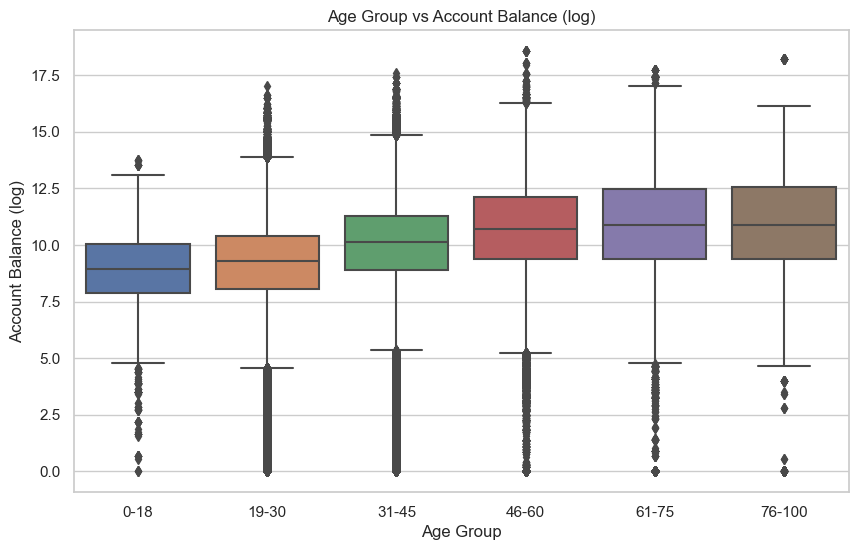

In [117]:
# Plot Age Group vs Account Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='CustAccountBalance_log', data=df)
plt.title('Age Group vs Account Balance (log)')
plt.xlabel('Age Group')
plt.ylabel('Account Balance (log)')
plt.show()

The boxplot suggests that while median account balances do not vary significantly across age groups, there is considerable variation within each group. The age groups 50-69 show a higher propensity for having outliers with large account balances, which could be attributed to peak earning years and accumulation of wealth through life-span.

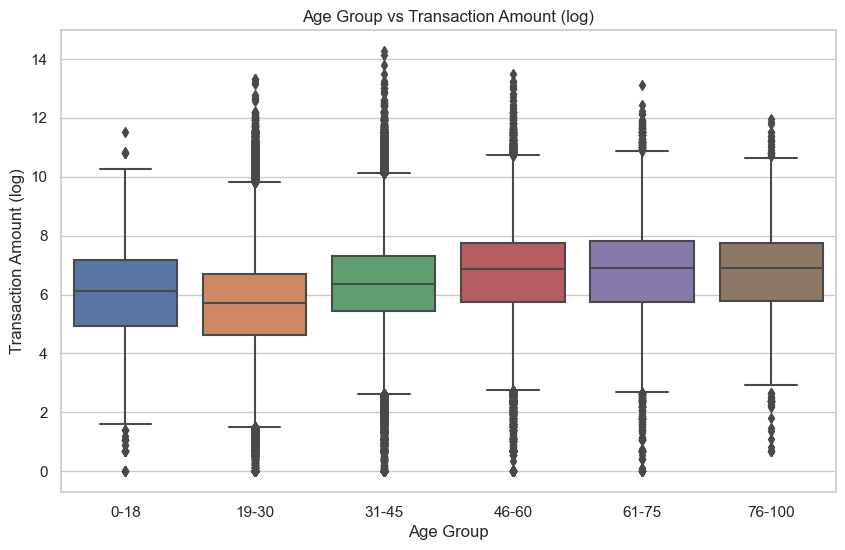

In [118]:
# Plot Age Group vs Transaction Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='TransactionAmount_log', data=df)
plt.title('Age Group vs Transaction Amount (log)')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount (log)')
plt.show()

Overall, there does not seem to be a clear pattern where a particular age group consistently has higher or lower transaction amounts. Each group has a similar distribution and number of outliers, suggesting that there is no strong age-related trend in transaction amounts.

In [119]:
# Anlayze the transaction volume over time and transaction amount over time to identify trends, peak transaction periods and seasonality. 

# Resample to get daily, weekly, or monthly transaction volume
daily_volume = df.resample('D', on='TransactionDate').size()
weekly_volume = df.resample('W', on='TransactionDate').size()
monthly_volume = df.resample('M', on='TransactionDate').size()

# Resample to get daily, weekly, or monthly transaction amount sums
daily_amount = df.resample('D', on='TransactionDate')['TransactionAmount (INR)'].sum()
weekly_amount = df.resample('W', on='TransactionDate')['TransactionAmount (INR)'].sum()
monthly_amount = df.resample('M', on='TransactionDate')['TransactionAmount (INR)'].sum()


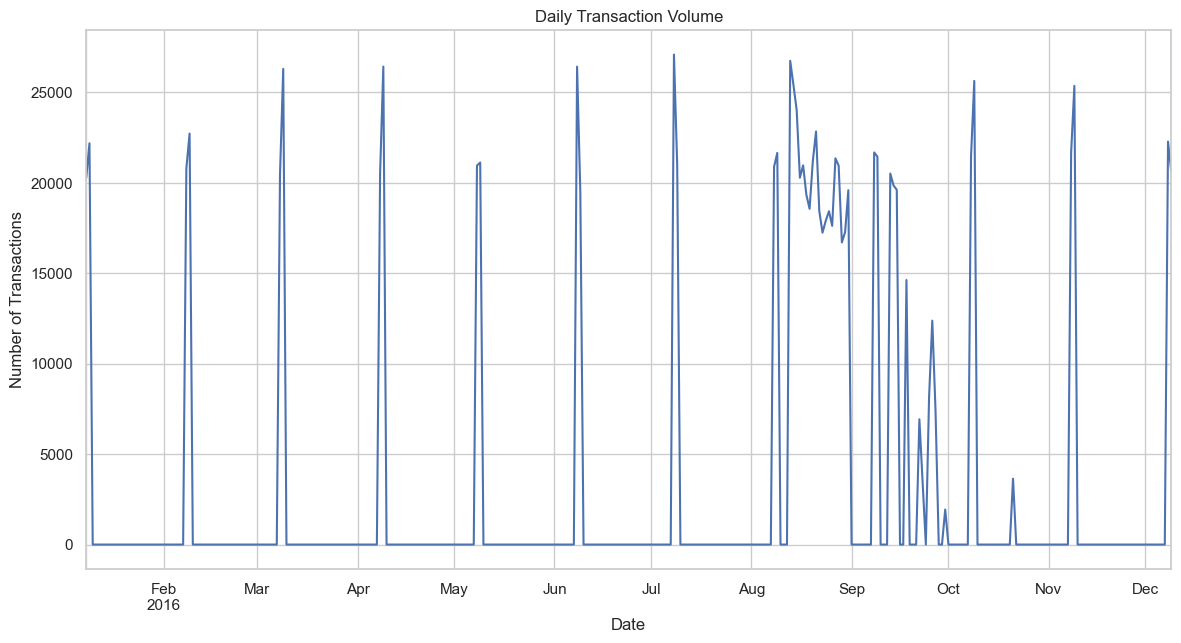

<Axes: title={'center': 'Monthly Transaction Volume'}, xlabel='TransactionDate'>

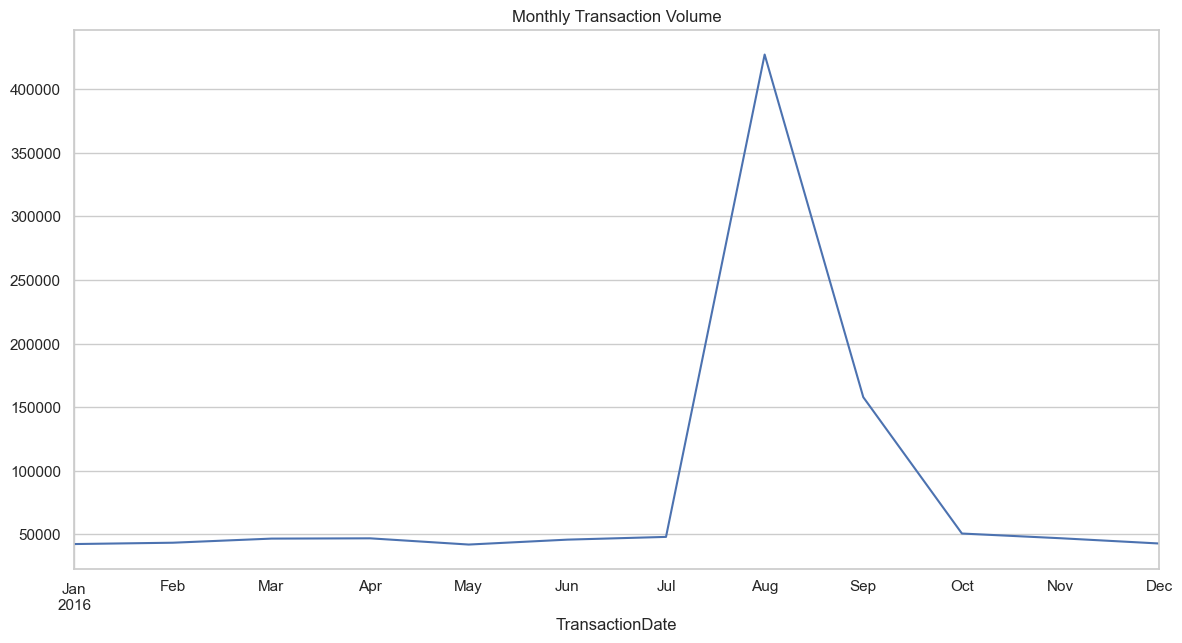

In [120]:
# Plot daily transaction volume
daily_volume.plot(figsize=(14, 7), title='Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Uncomment to plot weekly or monthly transaction volume
#Weekly_volume.plot(figsize=(14, 7), title='Weekly Transaction Volume')
monthly_volume.plot(figsize=(14, 7), title='Monthly Transaction Volume')

The line graph above illustrates the daily transaction volume throughout the year 2016. Each point on the x-axis represents a day, and the y-axis shows the number of transactions recorded on that day. The graph shows significant variability, with pronounced peaks and troughs suggesting days of high and low transaction activity, respectively. Notably, there are several spikes in the volume which may correspond to specific days where transaction activity is typically higher, potentially due to periodic events such as salary disbursements, bill payment deadlines, or other seasonal factors. Conversely, the noticeable dips could align with weekends or public holidays. Understanding these patterns is crucial for managing banking operations, including liquidity management and staffing requirements. Further analysis could include comparing these trends across multiple years or against known dates of holidays and events to draw more detailed conclusions.

The second line graph shows a consistent transaction activity for most of the year with a dramatic spike from July. This peak may indicate a seasonal event, promotional activity, or an external factor that caused an increase in the number of transactions. The rest of the months show relatively stable transaction volumes, which can be considered the baseline activity level for this particular year.

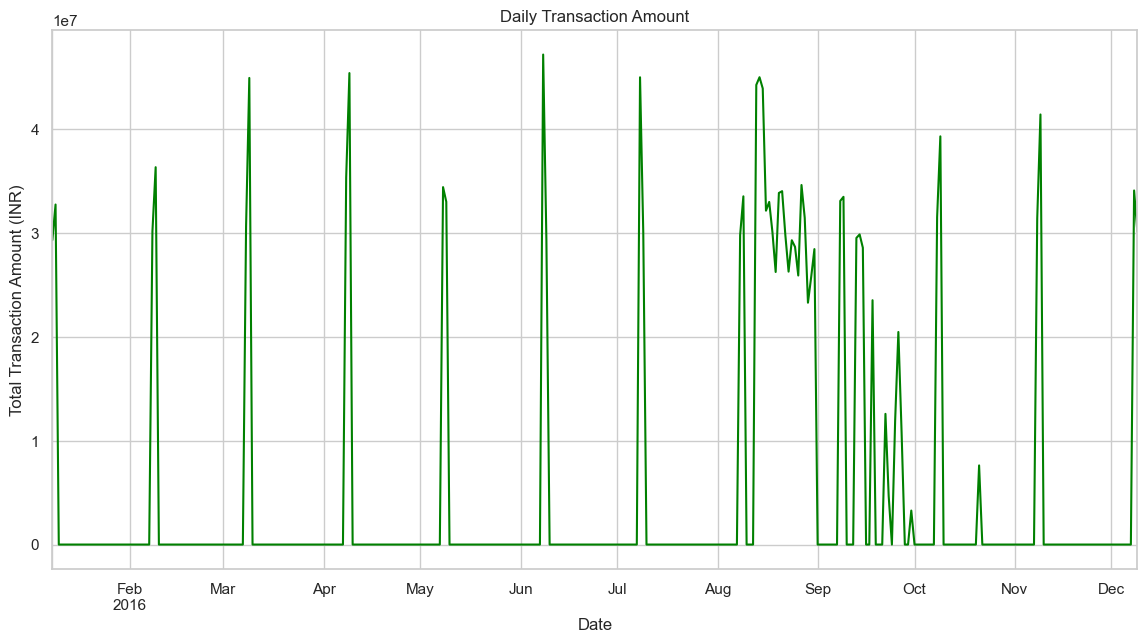

In [121]:
# Plot daily transaction amount
daily_amount.plot(figsize=(14, 7), title='Daily Transaction Amount', color='green')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (INR)')
plt.show()


This graph represents the daily total transaction amounts in INR throughout the year 2016. It reveals the fluctuating financial activity of customers on a day-to-day basis. The vertical axis, which is logarithmically scaled, indicates the magnitude of the daily transaction sums, facilitating the visualization of a wide range of values. Several pronounced peaks can be observed, suggesting days with particularly high transaction volumes. These could align with periods of increased economic activity, such as salary distribution days, large-scale bill settlements, or shopping seasons. In contrast, the lower points, or troughs, suggest days with reduced transaction activity, possibly correlating with weekends, public holidays, or other non-banking days

the second line graph also shows a consistent level of financial activity across most months, with a dramatic surge in July. The rest of the months maintain a relatively stable transaction volume, suggesting a regular pattern of financial activity outside of this exceptional peak.

# Dimensional Reduction (PCA)

In [122]:
# Selecting relevant numerical columns for PCA
features_for_pca = ['CustAccountBalance_log', 'TransactionAmount_log', 'TransactionFreq', 'CustomerAge']

# Standardizing the features
scaler = StandardScaler()
bank_data_scaled = scaler.fit_transform(df[features_for_pca])

# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()

bank_data_pca = pca.fit_transform(bank_data_scaled)

# Determining the number of components based on explained variance
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.34087692, 0.25000223, 0.22232698, 0.18679387])

- PC1: The first principal component explains approximately 34.09% of the variance in the dataset. This is the largest share of variance provided by any single component, indicating that PC1 captures the most significant pattern in the data among the four components.
- PC2: The second principal component accounts for approximately 25.00% of the variance. This is a substantial amount but less than the first, suggesting that PC2 captures important but less dominant patterns in the data. 
- PC3: The third component explains about 22.23% of the variance. While still significant, it indicates that the patterns captured by this component are less dominant than those captured by PC1 and PC2. It's not the primary source of structure in the data but still relevant.
- PC4: The fourth and final component explains around 18.68% of the variance. This is the least amount of variance explained by a single component, which suggests that it captures the most subtle patterns in the data.



In [123]:
# Calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create column names based on the number of components
component_names = ["PC" + str(i+1) for i in range(pca.n_components_)]

# Create the DataFrame with the correct number of component names
loading_matrix = pd.DataFrame(loadings, columns=component_names, index=features_for_pca)

# Display the loading matrix
print(loading_matrix)

                             PC1       PC2       PC3       PC4
CustAccountBalance_log  0.706696 -0.003062 -0.411588 -0.575471
TransactionAmount_log   0.734595 -0.002947 -0.235971  0.636145
TransactionFreq        -0.000122  0.999965 -0.008323  0.000944
CustomerAge             0.569613  0.007813  0.814956 -0.106432


The loadings provide insights into the structure of the data, showing how each principal component captures different aspects of the customer behavior based on the financial data. These insights can help in understanding customer segments, informing strategy, and tailoring services.

- PC1 seems to represent the financial magnitude axis, capturing variations in customers' account balances and transaction amounts, with a lesser effect from customer age.
- PC2 is the transaction frequency axis.
- PC3 may represent an age-related axis where age varies inversely with account balance
- PC4 seems to represent an axis where the transaction amount and account balance are inversely related

# K-Means Clustering 

In [124]:
# Elbow Method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)  # Testing 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(bank_data_pca)
    inertia.append(kmeans.inertia_)

c:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

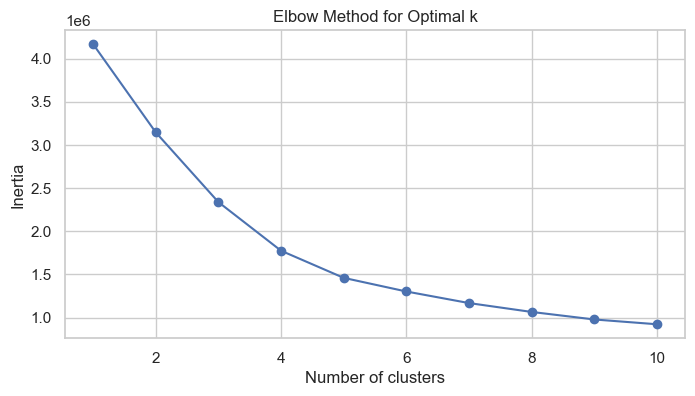

In [125]:
# Plotting the Elbow Plot
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, 'o-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The Elbow Method graph indicates that 4 clusters might be the optimal choice for the K-Means clustering of the dataset, as the inertia's rate of decline lessens after this point, suggesting diminishing returns with additional clusters.







In [126]:
# Select an optimal number of clusters 
optimal_k = 4  
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_optimal.fit(bank_data_pca)

c:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [127]:
# Assign cluster labels to the dataset
cluster_labels = kmeans_optimal.labels_

df['Cluster'] = cluster_labels
df['Cluster'].value_counts()

0    454279
1    277621
3    253431
2     56282
Name: Cluster, dtype: int64

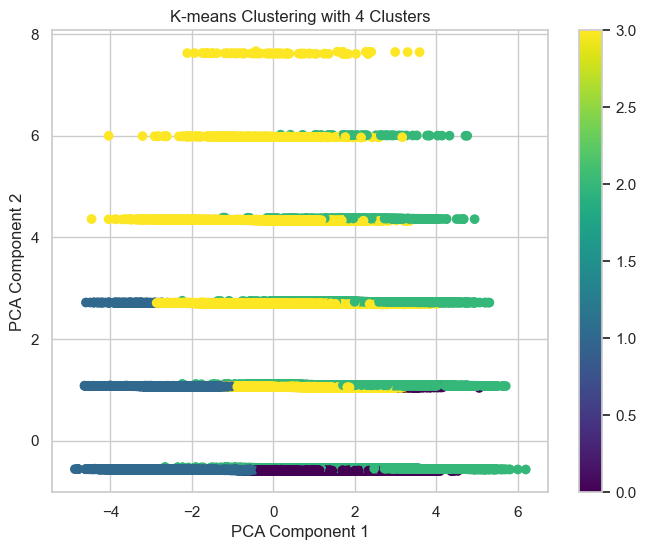

In [128]:
# Visualize the clusters 
if bank_data_pca.shape[1] >= 3:
    plt.figure(figsize=(8, 6))
    plt.scatter(bank_data_pca[:, 0], bank_data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.title('K-means Clustering with 4 Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

The clustering provides a visualization of how customers can be segmented based on their transaction behaviors and financial profiles. These insights can be used for targeted marketing campaigns, personalized product offerings, or further analysis of customer behavior patterns

- PCA Component 1 (X-Axis): This axis is primarily influenced by CustAccountBalance_log and TransactionAmount_log, with a moderate influence from CustomerAge. The spread of data points along this axis in each cluster suggests a range of customer account balances, transaction amounts, and to some extent, age. Since PC1 captures the financial magnitude, the clusters spread along this axis may indicate groups with different levels of financial engagement.
- PCA Component 2 (Y-Axis): This axis is strongly influenced by TransactionFreq. The distinct horizontal bands of clusters suggest that each cluster represents a different transaction frequency level. The clusters do not overlap along the PC2 axis, indicating clear separation based on transaction frequency.

Cluster Characteristics:

- The bottom cluster (dark purple) is centered around lower values of PC1, which might represent customers with lower account balances and transaction amounts.
- The second cluster from the bottom (blue) is spread across a wide range of PC1 values, indicating a mix of customers with varying financial magnitudes.
- The third cluster from the bottom (green) is also spread across PC1 but is distinctly separate along PC2, suggesting a different level of transaction frequency.
- The top cluster (yellow) shows a similar spread in PC1 as the green cluster, but it is at a higher level on PC2, indicating another distinct transaction frequency band.

# HDB-SCAN

In [129]:
# HDB-SCAN Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)

clusterer.fit(bank_data_pca)

# Assign HDBSCAN cluster labels to the dataset
cluster_labels = clusterer.labels_
df['HDBSCAN_Cluster'] = cluster_labels

# Visualize the HDBSCAN clusters
if bank_data_pca.shape[1] >= 3:
    plt.figure(figsize=(8, 6))
    plt.scatter(bank_data_pca[:, 0], bank_data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.title('HDBSCAN Clustering')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

While we experimented with HDBSCAN for its advanced clustering capabilities, it didn't offer the distinct separation we needed for our dataset. Consequently, we turned to K-Means clustering, which clearly delineated four actionable customer segments. This approach proved more suitable for informing our targeted engagement strategies.






# Conlussion

- Patterns and Anomalies in Transaction Volumes and Amounts:
The exploratory data analysis revealed that transaction volumes and amounts are influenced by various factors, including demographics and time periods. Significant variations were observed across different age groups, with older demographics (50-69) tending to have outliers with larger account balances, potentially due to peak earnings and wealth accumulation.
Seasonal patterns were evident in the transaction data, with peaks suggesting high activity periods possibly due to salary disbursements, bill payments, and shopping seasons, and troughs potentially indicating weekends or public holidays.

- New Features Engineered from the Dataset:
New features were engineered to provide deeper insights into customer behaviors, such as Age Group, Transaction Volume, Average Transaction Amount, Transaction Frequency, and Day of Week Analysis.
These features allowed for a better understanding of customer profiles and behaviors, showing how different age groups engage with their finances and how transaction frequencies could indicate lifestyle or income patterns.

- Distinct Customer Segments Identified Using K-means Clustering:
Four distinct customer segments were identified using K-means clustering, each with unique transactional behaviors:
    1. The first cluster, characterized by lower PC1 values, might represent younger or less wealthy customers with lower account balances and transaction amounts.
    2. The second cluster, with a wide range of PC1 values, suggests a diverse segment with varied financial engagement.
    3. The third cluster, distinct in transaction frequency (PC2), could represent a segment with regular, possibly budget-conscious transaction behaviors.
    4. The fourth cluster, with higher values on both PC1 and PC2, might indicate affluent customers engaged in frequent high-value transactions.

- Targeted Strategies to Enhance Customer Satisfaction and Profitability:
    1. For the first cluster, banks can offer savings programs or micro-investment products to help them grow their wealth.
    2. For the second, diverse cluster, personalized financial advice and a range of product offerings could cater to their varied needs.
    3. The third cluster could benefit from loyalty programs and regular engagement strategies to encourage consistent transaction behaviors.
    4. The fourth cluster may be targeted with premium services, high-value investment options, and exclusive benefits to enhance satisfaction and retain their business.

Overall, these insights enable the bank to craft tailored customer engagement strategies that can maximize satisfaction for different segments while also driving profitability. By recognizing and acting upon the distinct needs and behaviors of each cluster, the bank can not only improve individual customer experiences but also enhance overall operational efficiency and service delivery.